In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df=pd.read_csv("student_scores.csv")

In [134]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [135]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [137]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Column

In [138]:
df=df.drop("Unnamed: 0",axis=1)

In [139]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender Distribution

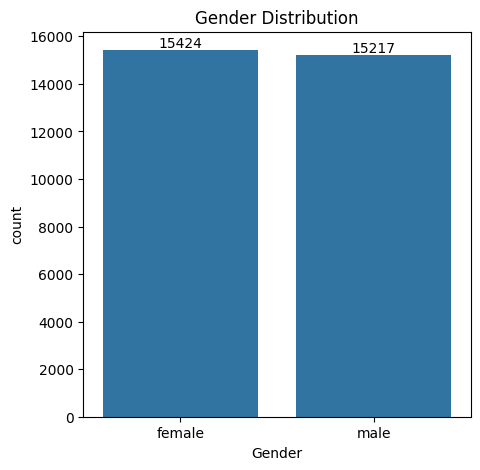

In [140]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

#### From the above char we have analysed that:
#### Number of female students are more than the number of male students

# Analysing student performance on the basis of parent education

In [141]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


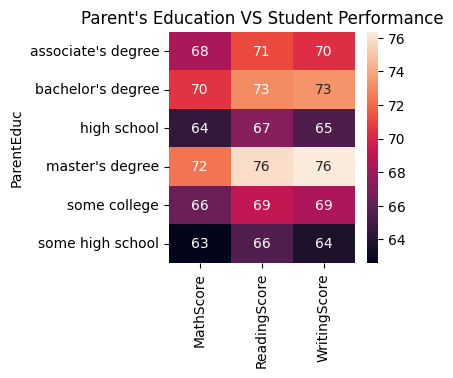

In [142]:
plt.figure(figsize=(3,3))
sns.heatmap(gb,annot=True)
plt.title("Parent's Education VS Student Performance")
plt.show()

#### From the above chart we have concluded that parent's education play a significat role on their children's academic preformance

# Analysing student performance on the basis of parent marital status

In [143]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


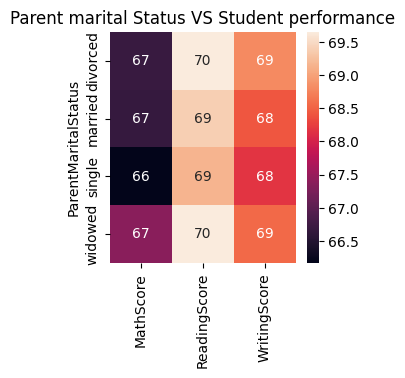

In [144]:
plt.figure(figsize=(3,3))
sns.heatmap(gb1,annot=True)
plt.title("Parent marital Status VS Student performance")
plt.show()

#### From the above heatmap we can say that parent marital status does not have or have negligible impact on their children's academic performance

# To detect Outliers

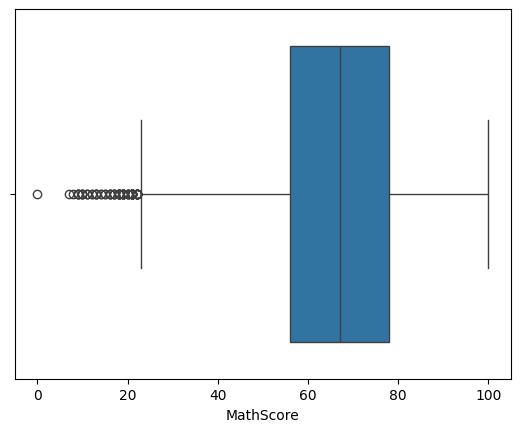

In [145]:
sns.boxplot(data=df,x="MathScore")
plt.show()

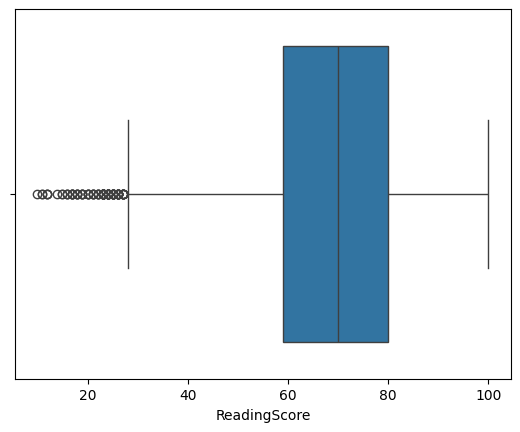

In [146]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

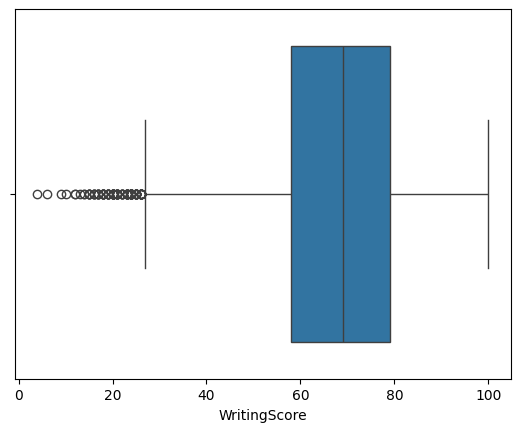

In [147]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

#### From the above charts we can say that Mathematics is the most difficult subject to score 
#### As it has lowest minimum value and students also score 0 in this subject
#### So the institute need to pay more attention to the Mathematics subject

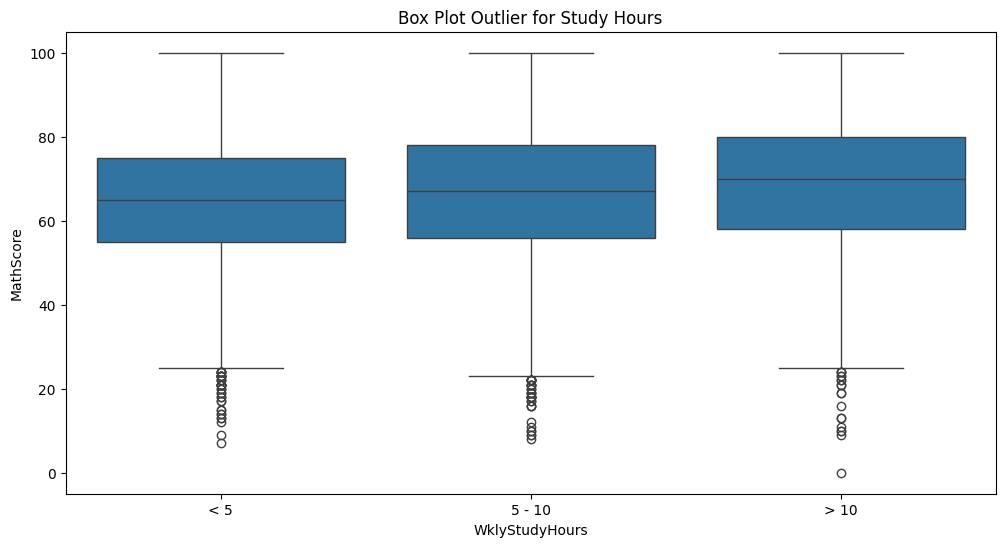

In [148]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='WklyStudyHours',y='MathScore')
plt.title('Box Plot Outlier for Study Hours')
plt.show()

#### From the above plot we can say that student who got 0 in Mathmatics used to study for more than 10 hours

# Distribution of the Ethnic Group

In [149]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


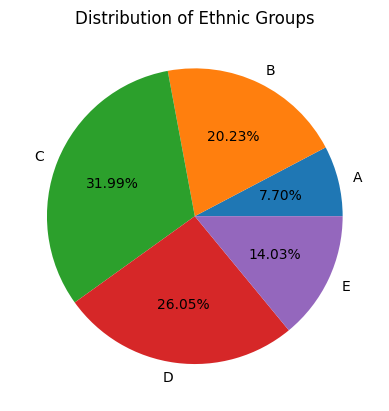

In [150]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["A","B","C","D","E"]
eglist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(eglist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

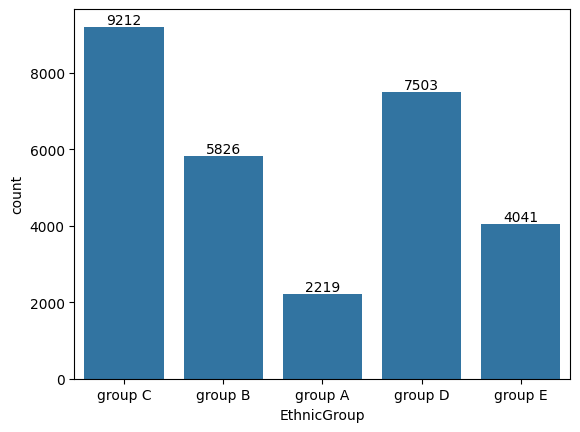

In [151]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])

### From the above charts we can conclude that the group C has the highest share

# Distribution of Weekly Study Hours

In [152]:
wsh=df['WklyStudyHours'].unique()
df.isnull().sum()
wsh1=df.dropna()

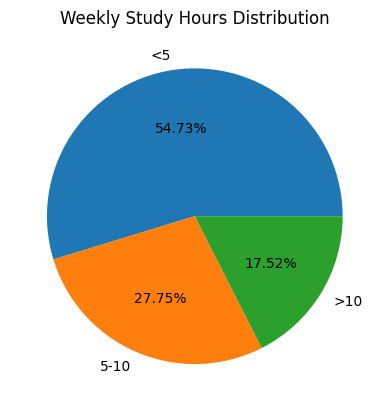

In [153]:
wsh1=df.groupby('WklyStudyHours')[['WklyStudyHours']].count()
l=["<5","5-10",">10"]
plt.pie(wsh1['WklyStudyHours'],labels=l, autopct="%1.2f%%")
plt.title("Weekly Study Hours Distribution")
plt.show()

#### From the above chart we can say that their are students who study less than 5 hours weekly are higher in number 

# Analysing student performance on the basis of their weekly study hours

In [154]:
gb2=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


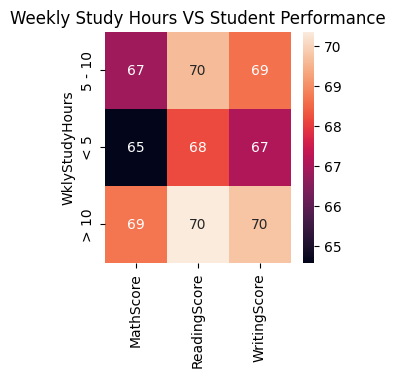

In [155]:
plt.figure(figsize=(3,3))
sns.heatmap(gb2,annot=True)
plt.title("Weekly Study Hours VS Student Performance")
plt.show()

#### From the above graph we analysed that:
#### The students who study less than 5 hours weekly score somewhat better or same as the students who study more than 5 hours weekly